### Pyber Data Analysis

Overview:
* Urban areas use Pyber the most, followed by suburban areas, while rural areas use it the least
* However, in terms of average fares, the order is reversed
* This contrast may be attributed to the number of Pyber drivers in each city type i.e. since urban areas have more drivers, the fares could have been competitively priced

Analysis by city type:
* Total Fares by City Type: Urban areas generate the most revenue (~2/3rds) for Pyber in fares, followed by suburban and rural areas
* Total Rides by City Type: In terms of number of rides, urban dwellers request the most rides (~2/3rds) from Pyber, followed by suburban and rural areas
* Total Drivers by City Type: Majority of Pyber drivers operate in urban areas, whereas the number of drivers in rural areas constitute a very small percentage.

Limitations:
* Distance of each ride - This can help understand the correlation between ride distance and fare. Probably, the reason why rural customers are charged higher fares is because they travel longer distances; thus, it may not be solely attributed to the low driver count.
* Data of rival ride-sharing companies operating in the same areas - Are fares lower in urban areas because Pyber had to slash rates due to heavy competition from rival companies? Are fares higher in rural areas because no such competition exists there?
* Population of cities - The low driver count in rural areas may be attributed to lesser demand, which is expected if they have a lower population density. This is pretty much a given, but it would be nice to validate this point with data.

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merge_df = pd.merge(ride_df, city_df, on="city", how="left")

# Display the data table for preview
merge_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [2]:
new_city_df = city_df.set_index('city')
new_city_df.head()

,driver_count,type
city,,
Richardfort,38,Urban
Williamsstad,59,Urban
Port Angela,67,Urban
Rodneyfort,34,Urban
West Robert,39,Urban


## Bubble Plot of Ride Sharing Data

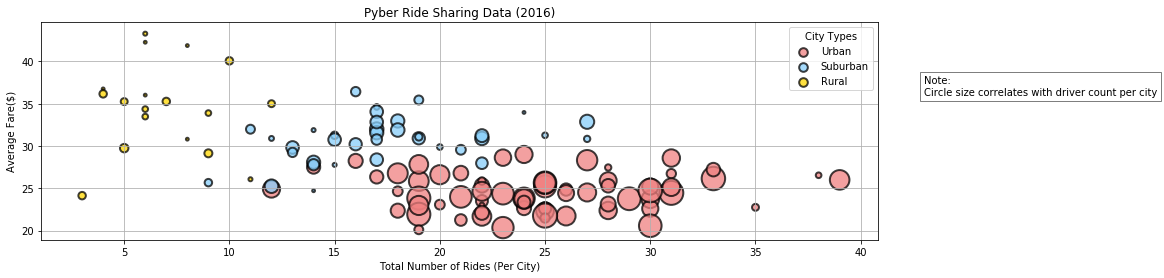

In [15]:
# Obtain the x and y coordinates for each of the three city types
fare_mean = (merge_df.groupby(['city']))['fare'].mean()
tot_rides_per_city = merge_df["city"].value_counts(sort=False)
scatter_df = pd.DataFrame({"Average fare":fare_mean, "Total rides": tot_rides_per_city})
scatter_df = pd.merge(scatter_df, new_city_df, left_index=True, right_index=True)

# Build the scatter plots for each city types
city_types = scatter_df['type'].unique()
colors = ["lightcoral", "lightskyblue", "gold"]

for i in range(len(city_types)):
    type_df = scatter_df.loc[scatter_df['type'] == city_types[i]]
    x_axis = type_df['Total rides']
    y_axis = type_df['Average fare']
    bub_size = type_df['driver_count']
    plt.scatter(x_axis, y_axis, marker="o", facecolors=colors[i], edgecolors="black", s=bub_size*8, alpha=0.75, linewidths = 2)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.grid()

# Create a legend
legnd_city = plt.legend(labels = city_types, title = "City Types")
    
for handle in legnd_city.legendHandles:
    handle.set_sizes([75.0])

#Increase size of the plot
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 4.0
fig_size[1] = 15.0

# for i in range(len(city_types)):
#     ((plt.legend()).legendHandles[i]).set_sizes([6.0])
#     plt.legend(labels = city_types)

# Incorporate a text label regarding circle size
plt.text(43, 36, "Note:\nCircle size correlates with driver count per city", bbox=dict(facecolor='white', alpha=0.5))
# Save Figure
plt.savefig("./data/Bubble_Pyber_Ride_Sharing.png")

In [12]:
# Show plot
plt.show()

## Total Fares by City Type

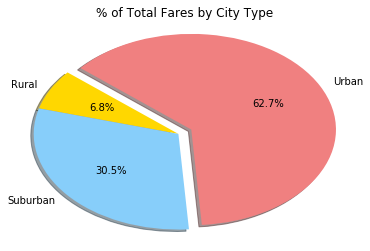

In [5]:
# Calculate Type Percents
type_perc_lst = (merge_df.groupby('type').sum())['fare']
pie_colors1 = ["gold", "lightskyblue", "lightcoral"]

# Build Pie Chart
plt.pie(type_perc_lst,
        explode = (0,0,.1),
        labels=type_perc_lst.index,
        colors=pie_colors1,
        autopct="%1.1f%%",
        shadow=True,
        startangle=140)
plt.axis("tight")
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("./data/Pie1_Percentage_of_Total_Fares_by_City_Type.png")

In [6]:
# Show Figure
plt.show()

## Total Rides by City Type

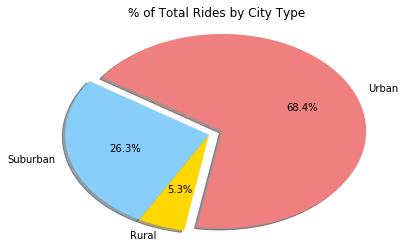

In [7]:
# Calculate Ride Percents
type_total_rides = merge_df['type'].value_counts()
pie_colors2 = ["lightcoral", "lightskyblue", "gold"]

#Build Pie Chart
plt.pie(type_total_rides,
        explode = (0.1,0,0),
        labels=type_total_rides.index,
        colors=pie_colors2,
        autopct="%1.1f%%",
        shadow=True,
        startangle=260)
plt.axis("tight")
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("./data/Pie2_Percentage_of_Total_Rides_by_City_Type.png")

# color_dict = {'Urban':'coral', 'Suburban':'lightblue', 'Rural':'gold'}
# print(color_dict['Urban'])

In [8]:
# Show Figure
plt.show()

## Total Drivers by City Type

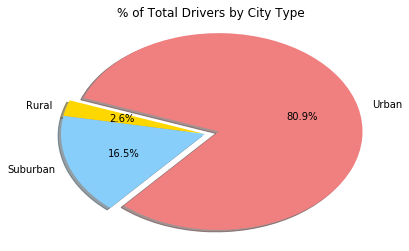

In [9]:
# Calculate Type Percents
type_driver_perc_lst = (city_df.groupby('type').sum())['driver_count']
pie_colors3 = ["gold", "lightskyblue", "lightcoral"]

# Build Pie Chart
plt.pie(type_driver_perc_lst,
        explode = (0,0,.1),
        labels=type_driver_perc_lst.index,
        colors=pie_colors3,
        autopct="%1.1f%%",
        shadow=True,
        startangle=160)
plt.axis("tight")
plt.title("% of Total Drivers by City Type")

# # Save Figure
plt.savefig("./data/Pie3_Percentage_of_Total_Drivers_by_City_Type.png")

In [10]:
# Show Figure
plt.show()